In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import packages and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Import and view data
homes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ZybookDataScience/Data/homes.csv').dropna()
homes

,ID,Price,Floor,Lot,Bath,Bed,BathBed,Year,Age,AgeSq,Gar,Status,DAc,School,DEd,DHa,DAd,DCr,DPa
0,1,388.0,2.180,4,3.0,4,12.0,1940,-3.0,9.00,0,Sold,0,Edison,1,0,0,0,0
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,2,Sold,0,Edison,1,0,0,0,0
2,3,386.0,2.112,5,2.0,4,8.0,1955,-1.5,2.25,2,Sold,0,Edison,1,0,0,0,0
3,4,350.0,1.442,6,1.0,2,2.0,1956,-1.4,1.96,1,Active,1,Adams,0,0,1,0,0
4,5,155.5,1.800,1,2.0,4,8.0,1994,2.4,5.76,1,Sold,0,Adams,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,249.9,2.081,5,2.1,4,8.4,1970,0.0,0.00,1,Sold,0,Harris,0,1,0,0,0
72,73,215.0,2.044,1,1.1,4,4.4,1936,-3.4,11.56,0,Sold,0,Parker,0,0,0,0,1
73,74,435.0,2.253,11,2.0,3,6.0,1979,0.9,0.81,2,Sold,0,Redwood,0,0,0,0,0
74,75,274.9,1.861,4,2.0,4,8.0,1995,2.5,6.25,2,Active,1,Parker,0,0,0,0,1


In [6]:
# Set seed
seed = 123

In [7]:
# Set proportion of data for the test set
test_p = 0.20

# Define input and output features
X = homes[['Floor']]
y = homes[['Price']]

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_p, random_state=seed
)

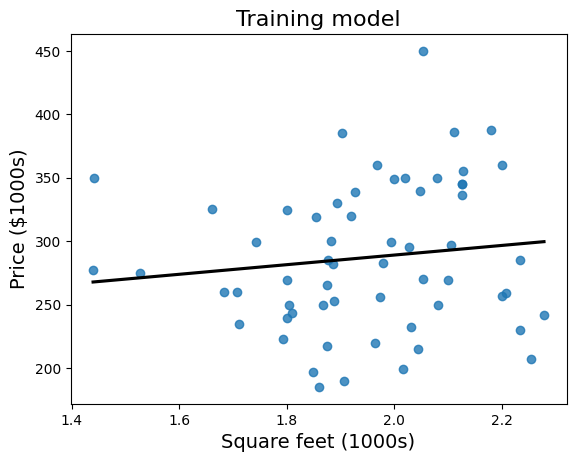

In [8]:
# Plot training dataset and regression line
p = sns.regplot(x=X_train, y=y_train, ci=False, line_kws={'color': 'black'})
p.set_xlabel('Square feet (1000s)', fontsize=14);
p.set_ylabel('Price ($1000s)', fontsize=14);
p.set_title('Training model', fontsize=16);

In [9]:
# Identify homes with high prices
homes[homes["Price"] > 400]

,ID,Price,Floor,Lot,Bath,Bed,BathBed,Year,Age,AgeSq,Gar,Status,DAc,School,DEd,DHa,DAd,DCr,DPa
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,2,Sold,0,Edison,1,0,0,0,0
73,74,435.0,2.253,11,2.0,3,6.0,1979,0.9,0.81,2,Sold,0,Redwood,0,0,0,0,0


In [10]:
# Initialize and fit the linear model
linearModel = LinearRegression()
linearModel = linearModel.fit(X_train, y_train)

# Print model coefficients
print('beta1 =', linearModel.coef_)
print('beta0 =', linearModel.intercept_)

beta1 = [[37.92605345]]
beta0 = [213.13396131]


In [12]:
# Regression metrics on training dataset
y_pred = linearModel.predict(X_train)
print('MSE =', mean_squared_error(y_train, y_pred))
print('MAE =', mean_absolute_error(y_train, y_pred))
print('R-squared =', r2_score(y_train, y_pred))

MSE = 3224.532078380617
MAE = 47.39109490948372
R-squared = 0.015520917773710008


In [13]:
# Regression metrics on testing dataset
y_pred = linearModel.predict(X_test)
print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))

MSE = 4377.548634520407
MAE = 53.02646796077678
R-squared = 0.07881601353080447


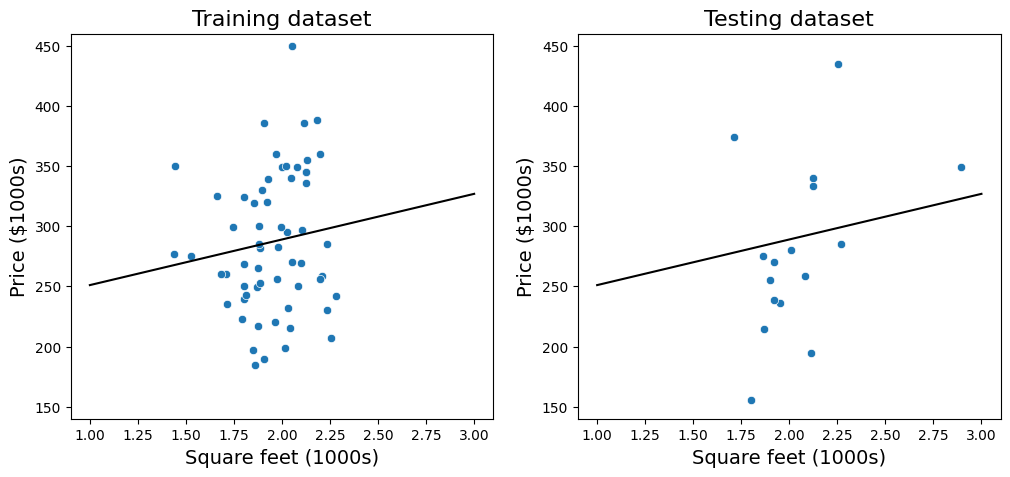

In [14]:
# Plot the model for the training and testing sets
plt.rcParams["figure.figsize"] = (12, 5)

x = pd.array([1, 2, 3])
yhat = 213.13396131 + 37.92605345 * x

plt.subplot(1, 2, 1)

# Training set subplot
p = sns.scatterplot(x=X_train['Floor'], y=y_train['Price'])
plt.plot(x, yhat, color='black')
p.set_xlabel('Square feet (1000s)', fontsize=14)
p.set_ylabel('Price ($1000s)', fontsize=14)
p.set_title('Training dataset', fontsize=16)
p.set_ylim(140, 460)

plt.subplot(1, 2, 2)
# Testing set subplot
p = sns.scatterplot(x=X_test['Floor'], y=y_test['Price'])
plt.plot(x, yhat, color='black')
p.set_xlabel('Square feet (1000s)', fontsize=14);
p.set_ylabel('Price ($1000s)', fontsize=14);
p.set_title('Testing dataset', fontsize=16);
p.set_ylim(140, 460);